##  [ CM 1 ]
__KEVAL PRAJAPATI (20908584, kbprajap@uwaterloo.ca)__


I have divided the solution for this problem in 3 steps:
- __1) Checking the basic statistics about the data. This includes:__<br><br>
- Checking the simple stats about the given data
- Checking the datatype of each column
- Checking for any missing value
- Checking the balance of each of the target label namely: Confirmed, Deaths and Recovered
- Checking the distribution of each of the column <br><br>
- __2) Data preprocessing:__<br><br>
- Handling the missing values: Since the dataset has no missing values as checked above so no need of handling those.
- Correcting the datatypes: The datatype of each feature is correct as checked above so no need of handling those.
- Outlier dectections
- Dropping features: Removing the __State__ column
- Normalization: Normalization of the dataset because the different feature have different scales and also have varying values like  Resident Population can be in millions while Sex ratio follows different unit and is less 100.<br><br>
- __3) Representation Learning: (PCA- Principal Component Analysis):__<br><br>
- __Steps applied in PCA__<br>
- __Scaling the data:__ In other terms we center and scale the data. Hence after centering the average value of each feature will be 0 and after scaling the standard deviation for the values of each feature will be 1.<br>
- __Calulate the PCA:__ The variation of each principal component is calculated. PCA will create a new set of features out of the old ones such that  they can be expressed as linear combinations of the old features. And all the new features are orthogonal to each other.<br>
- __Calulate the cummulative variance ratio:__ It will help in decide how many principal components contribute can in representing the original dataset.<br>
- Once we decide the number of PCs with the help of scree plot. We will extract those PCs.


In [46]:
# AUTHOR: KEVAL PRAJAPTI
# AIM: DATA PREPROCESSING

# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# Importing the dataset
df = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assigments\Assignment 3\Dataset\dkmacovid_train.csv')
df.head()

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,5024279,99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,733391,1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,7151502,62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,3011524,57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,39538223,253.7,13,99,True,True,False


### Feature exaplanation <br>
- __1) Day:__ Date in January 2021 ranging from Jan 2 to Jan 31.
- __2) State ID:__ Arbitrary ID number for each state, based on alphabetical order. Note there are 51 states since the District of Columbia is also included.
- __3) State:__ Name of the US State.
- __4) Lat:__ Latitude for the geographic centre of the state.
- __5) Long :__ Longitude for the geographic centre of the state.
- __6) Active:__ Number of active, tracked COVID-19 cases that day in that state.
- __7) Incident Rate:__ cases per 100,000 persons.
- __8) Total Test Results:__ Total number of people who have been tested. 
- __9) Case Fatality Ratio:__ Number recorded deaths * 100/ Number confirmed cases.
- __10)Testing Rate:__ Total test results per 100,000 persons
- __11)Resident Population 2020 Census:__ Population of state as per 2021 census
- __12)Population Density 2020 Census:__ Population density is a measure of average population per square mile
- __13)Density Rank 2020 Census:__ Density Ranking.
- __14)SexRatio:__ number of males per 100 females.

### Target Labels
- __1) Confirmed:__ True:(Increase in Confirmed Total Cases on that day) : False (No increase)
- __2) Deaths:__ True: (Increase in number of Deaths on that day) : False (No increase)
- __3) Recovered:__ True:(Increase in number of Recovered cases on that day) : False (No increase)


### 1) Checking basic statistics of the data

In [24]:
# Checking the basic stats for the dataset
print(df.describe())

               Day     State ID          Lat        Long_        Active  \
count  1380.000000  1380.000000  1380.000000  1380.000000  1.380000e+03   
mean     16.500000    25.239130    39.470717   -92.879928  2.610390e+05   
std       8.658579    14.513405     6.070494    19.632514  4.914059e+05   
min       2.000000     1.000000    21.094300  -157.498300  9.550000e+02   
25%       9.000000    12.000000    35.630100  -105.311100  2.731600e+04   
50%      16.500000    25.500000    39.583950   -88.259400  1.005915e+05   
75%      24.000000    37.000000    43.326600   -77.209800  2.592418e+05   
max      31.000000    51.000000    61.370700   -69.381900  3.283336e+06   

       Incident_Rate  Total_Test_Results  Case_Fatality_Ratio   Testing_Rate  \
count    1380.000000        1.380000e+03          1380.000000    1380.000000   
mean     7203.192905        5.271097e+06             1.631757   91763.237514   
std      2305.025102        6.991478e+06             0.656702   40858.185997   
min 

In [25]:
# CHECKING DATA TYPE
print('\nData type of each column\n',df.dtypes)


Data type of each column
 Day                                  int64
State ID                             int64
State                               object
Lat                                float64
Long_                              float64
Active                               int64
Incident_Rate                      float64
Total_Test_Results                   int64
Case_Fatality_Ratio                float64
Testing_Rate                       float64
Resident Population 2020 Census      int64
Population Density 2020 Census     float64
Density Rank 2020 Census             int64
SexRatio                             int64
Confirmed                             bool
Deaths                                bool
Recovered                             bool
dtype: object


In [26]:
# CHECKING FOR ANY MISSING VALUES
print('\n Missing values:')
print(df.isnull().sum())


 Missing values:
Day                                0
State ID                           0
State                              0
Lat                                0
Long_                              0
Active                             0
Incident_Rate                      0
Total_Test_Results                 0
Case_Fatality_Ratio                0
Testing_Rate                       0
Resident Population 2020 Census    0
Population Density 2020 Census     0
Density Rank 2020 Census           0
SexRatio                           0
Confirmed                          0
Deaths                             0
Recovered                          0
dtype: int64


In [27]:
# Number of samples of particular state in order to check if there is any missing state value
print('\n Number of samples of particular states:')
print(df['State'].value_counts())


 Number of samples of particular states:
Arkansas                30
South Carolina          30
Oregon                  30
California              30
Arizona                 30
Minnesota               30
Georgia                 30
Oklahoma                30
Wyoming                 30
Hawaii                  30
North Carolina          30
West Virginia           30
Virginia                30
Maryland                30
Indiana                 30
Colorado                30
Vermont                 30
Missouri                30
Rhode Island            30
Pennsylvania            30
Ohio                    30
Wisconsin               30
South Dakota            30
Louisiana               30
New York                30
Massachusetts           30
Nevada                  30
Florida                 30
North Dakota            30
Alabama                 30
New Jersey              30
New Mexico              30
Kansas                  30
Mississippi             30
Nebraska                30
Idaho        


 Number of samples belonging label CONFIRMED:
True     1329
False      51
Name: Confirmed, dtype: int64

 Number of samples belonging label DEATHS:
True     1244
False     136
Name: Deaths, dtype: int64

 Number of samples belonging label RECOVERED:
True     864
False    516
Name: Recovered, dtype: int64


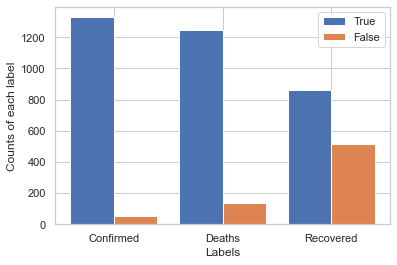

In [28]:
# CHECKING BALANCE OF TARGET LABELS
print('\n Number of samples belonging label CONFIRMED:')
print(df['Confirmed'].value_counts())
print('\n Number of samples belonging label DEATHS:')
print(df['Deaths'].value_counts())
print('\n Number of samples belonging label RECOVERED:')
print(df['Recovered'].value_counts())

X = ['Confirmed','Deaths','Recovered']

T = [] 
F = []
def counts(s):
    for i in range(3):
        true = df[s[i]].value_counts()[1]
        false = df[s[i]].value_counts()[0]
        T.append(true)
        F.append(false)
    return T,F
counts(X)
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2,T,0.4,label = 'True')
plt.bar(X_axis + 0.2,F,0.4,label = 'False')
plt.xticks(X_axis,X)
plt.xlabel('Labels')
plt.ylabel('Counts of each label')
plt.legend()
plt.show()


As per the graph the target label __Confirmed__ is the least balanced while the __Recovered__ label is the most balanced among the 3 target labels

<Figure size 144x144 with 0 Axes>

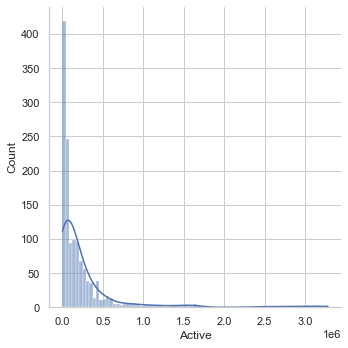

<Figure size 144x144 with 0 Axes>

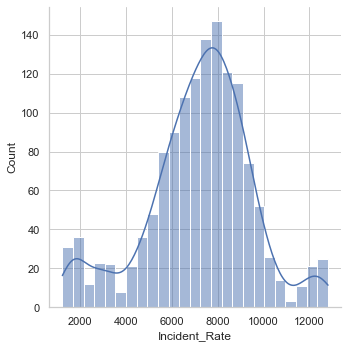

<Figure size 144x144 with 0 Axes>

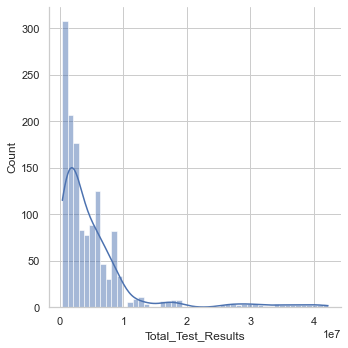

<Figure size 144x144 with 0 Axes>

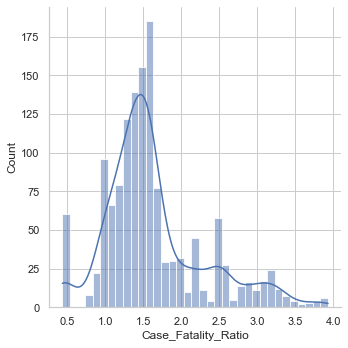

<Figure size 144x144 with 0 Axes>

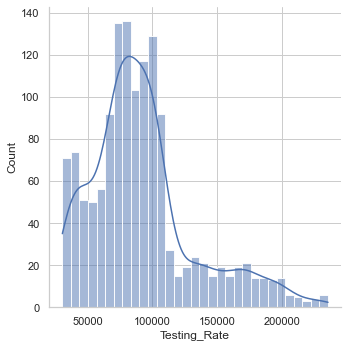

<Figure size 144x144 with 0 Axes>

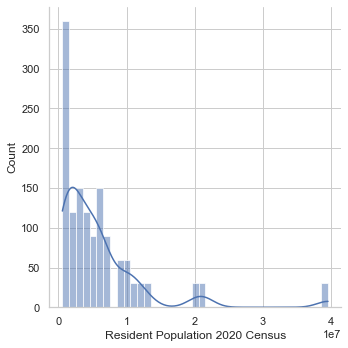

<Figure size 144x144 with 0 Axes>

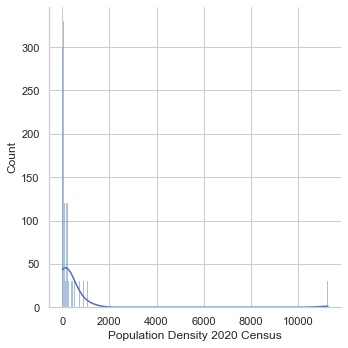

<Figure size 144x144 with 0 Axes>

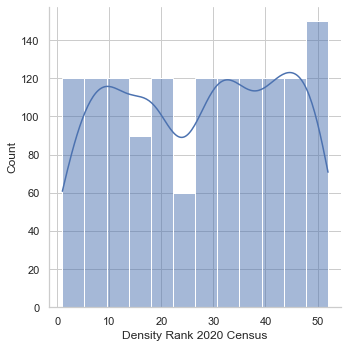

<Figure size 144x144 with 0 Axes>

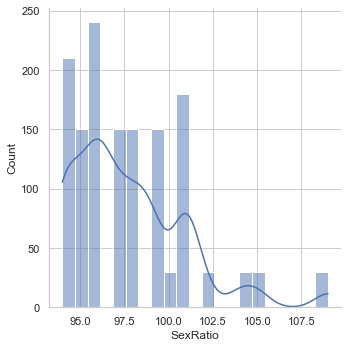

In [29]:
# Observing the distribution of dataset
plt.figure(figsize=(2,2))
sns.displot(df['Active'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(df['Incident_Rate'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(df['Total_Test_Results'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(df['Case_Fatality_Ratio'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(df['Testing_Rate'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(df['Resident Population 2020 Census'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(df['Population Density 2020 Census'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(df['Density Rank 2020 Census'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(df['SexRatio'], kde=True)

#### Hence after normal data walk through here are the remarks:
- __1)__ Dataset has no missing values
- __2)__ The datatype of each of the feature is appropriate
- __3)__ Number of states given in dataset are not 51 (they are 46) and also the state ID is not in sequence because some numbers are skipped
- __4)__ The data is bit redundant because of the inclusion of latitude and longitude since State name is already mentioned and longitude and latitude won't provide any further information in our case
- __5)__ Target lables are highly imbalanced
- __6)__ Most of the features doesn't follow Gaussian distribution. 

### 2) Data preprocessing

__Preprocessing steps:__
- __a) Handling the missing values:__ Since the dataset has no missing values as checked above so no need of handling those.<br><br>
- __b) Correcting the datatypes:__ The datatype of each feature is correct as checked above so no need of handling those.<br><br>
- __c) Outlier dectections__<br><br>
- __d) Dropping features:__ Removing the __Day__ and __State ID__ column.<br><br>
- __e) Normalization:__ Normalization of the dataset because the different feature have different scales and also have varying values like  Resident Population can be in millions while Sex ratio follows different unit and is less 100.<br><br>

#### Preprocessing

__c) Outlier detection:__<br>
Outliers are those values which differ significanlty from the given distribution. Many a times the outliers reveal some special or interesting pattern  but in given datasets the detected outliers are the one will have geospatial differences and on the high end of the population spectrum.


<AxesSubplot:ylabel='SexRatio'>

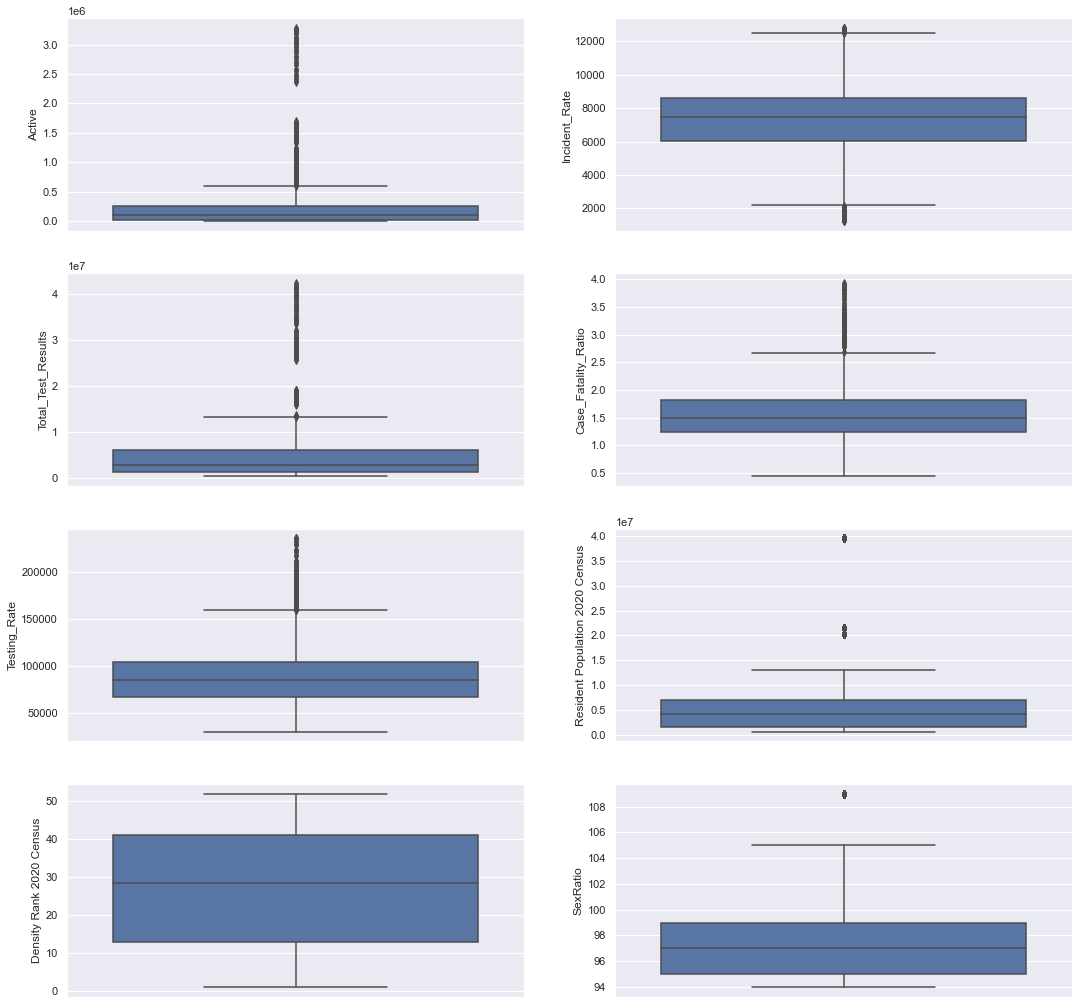

In [30]:
sns.set()
fig, axes = plt.subplots(4, 2,  figsize=(18, 18))
sns.set_theme(style='whitegrid')
sns.boxplot(ax=axes[0, 0], data=df, y = 'Active')
sns.boxplot(ax=axes[0, 1], data=df, y = 'Incident_Rate')
sns.boxplot(ax=axes[1, 0], data=df, y = 'Total_Test_Results')
sns.boxplot(ax=axes[1, 1], data=df, y = 'Case_Fatality_Ratio')
sns.boxplot(ax=axes[2, 0], data=df, y = 'Testing_Rate')
sns.boxplot(ax=axes[2, 1], data=df, y = 'Resident Population 2020 Census')
sns.boxplot(ax=axes[3, 0], data=df, y = 'Density Rank 2020 Census')
sns.boxplot(ax=axes[3, 1], data=df, y = 'SexRatio')

From above one can observe that there are several outliers present in different features. Hence I will be using IQR method to see which are the actual outliers and do I really need to remove them or not.

In [31]:
# Outlier detection using IQR method

def outliers_det(df, feature, val=0, drop=False, replace=False):
    Q1_value = df[feature].quantile(0.20)
    Q3_value = df[feature].quantile(0.80)
    IQR_value = Q3_value - Q1_value
    border = IQR_value*1.5 
    
    Outliers = (df[feature] < Q1_value-border) | (df[feature] > Q3_value+border)
    Outliers = Outliers.tolist()
    Outliers_index = np.where(Outliers)[0]
    
    print("\n Feature name: \t",feature,"\n  No. of Outliers: \t", len(Outliers_index), "\n Total instances \t: ",len(Outliers))
    print("\n Outlier Index\t\t Outlier Value\t\t Outlier State")
    for i in Outliers_index:
        print("\n",i,"\t\t\t", round(df[feature].iloc[i],3),"\t\t", df["State"].iloc[i])
    
   # print('\nRemoving outliers of: ', feature)
   # for i in Outliers_index:
   #     df.drop(df.index[i],inplace = True)
    
    return df


for i in ['Active','Lat','Long_','Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio','Testing_Rate','Resident Population 2020 Census','Density Rank 2020 Census','SexRatio']:
    outliers_det(df, i)


 Feature name: 	 Active 
  No. of Outliers: 	 108 
 Total instances 	:  1380

 Outlier Index		 Outlier Value		 Outlier State

 4 			 2362015 		 California

 9 			 1332943 		 Florida

 30 			 869564 		 New York

 50 			 2400292 		 California

 55 			 1343449 		 Florida

 76 			 881080 		 New York

 96 			 2431220 		 California

 101 			 1354602 		 Florida

 122 			 891601 		 New York

 142 			 2468414 		 California

 147 			 1369935 		 Florida

 168 			 904159 		 New York

 188 			 2502931 		 California

 193 			 1387589 		 Florida

 214 			 920006 		 New York

 234 			 2547789 		 California

 239 			 1407241 		 Florida

 260 			 935524 		 New York

 280 			 2590723 		 California

 285 			 1426586 		 Florida

 306 			 954019 		 New York

 326 			 2645555 		 California

 331 			 1441893 		 Florida

 352 			 970778 		 New York

 372 			 2687858 		 California

 377 			 1454098 		 Florida

 398 			 985978 		 New York

 418 			 2727541 		 California

 423 			 1465515 		 Florida

 444 			 99

Following are the outlier states in the various features:
- __Active__: California, Florida, New York and Georgia
- __Lat and Long.__: Alaska and Hawaii
- __Total Test Results__: California, Florida and New York
- __Case fatality__: New York and New Jersy
- __Testing rate__: Rhode Island and Massachusetts
- __Resident Population 2020 Census:__ California, Florida and New York

- Given our dataset is small and also the majority of the outliers detected are due to geospatial location and high population I won't be removing the outliers because it will lead to loss of some of the most important information of major and prominent states of US. For an example the state of California, Florida and New York are detected as outliers w.r.t Active feature now a valid reason for that can be they are high populated states and removing them as outliers will be causing an immense loss and I suspect that the models will significantly be affected by these important samples and removal of them may cause the model to produce a false image of COVID situation in US and hence inturn will bias our results. Same goes for Total test results and Resident Population 2020 features <br><br>

- Also the state of Hawaii and Alaska are detected as outlier because geographically they are located very far from mainland of USA. Hence again deleting them will bias our results.

- In Case fatality, New York is detected as an outlier and but that is a fact. Intially during the COVID19 outbreak New York had the highest cases and deaths which in turn increased the death toll of US. And removing that as an outlier will more like introducing bias.   

__d) Dropping the features:__<br>
- __2) State__ :Since __State__ feature is already represented by the feature __State Id__, the __State__ feature can removed because it just increase redundancy.

In [32]:
df2 = df.copy()
df2 = df2.drop(columns=['State'])
df2.columns

Index(['Day', 'State ID', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident Population 2020 Census', 'Population Density 2020 Census',
       'Density Rank 2020 Census', 'SexRatio', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

__e) Normalization:__<br>
Since most of the features doesn't follow Gaussian distribution as observed from above graphs. It is better to Standardize the dataset. Also this will help in PCA and LDA in CM2.

In [73]:
std_scaler = StandardScaler()
df2_std = df2.copy()
df2_std.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]]= std_scaler.fit_transform(df2_std.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]])
df2_std.to_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assigments\Assignment 3\Dataset\dkma_COVID_standardized.csv')
df2_std.head()

### 3) PCA (Principal Component Analysis)

__Steps applied in PCA__<br>
- __1)Scaling the data:__ In other terms we center and scale the data. Hence after centering the average value of each feature will be 0 and after scaling the standard deviation for the values of each feature will be 1.<br>
- __2)Calulate the PCA:__ The variation of each principal component is calculated. PCA will create a new set of features out of the old ones such that  they can be expressed as linear combinations of the old features. And all the new features are orthogonal to each other.<br>
- __3)Calulate the cummulative variance ratio:__ It will help in decide how many principal components contribute can in representing the original dataset.<br>
- __4)__ Once we decide the number of PCs with the help of scree plot. We will extract those PCs.

In [34]:
#Dropping the labels
X = df2_std.drop(columns=['Recovered','Deaths','Confirmed'])

In [38]:
pca = PCA()
# Fitting the training data and then tranforming it
pca.fit(X)
pca_data = pca.transform(X)

In [39]:
pca.explained_variance_ratio_

array([7.11088825e-01, 2.52958442e-01, 1.26086321e-02, 7.94190822e-03,
       5.34647639e-03, 3.11153993e-03, 2.51369442e-03, 1.62147435e-03,
       1.47745460e-03, 6.77099367e-04, 3.65844452e-04, 2.25369140e-04,
       6.32399468e-05])

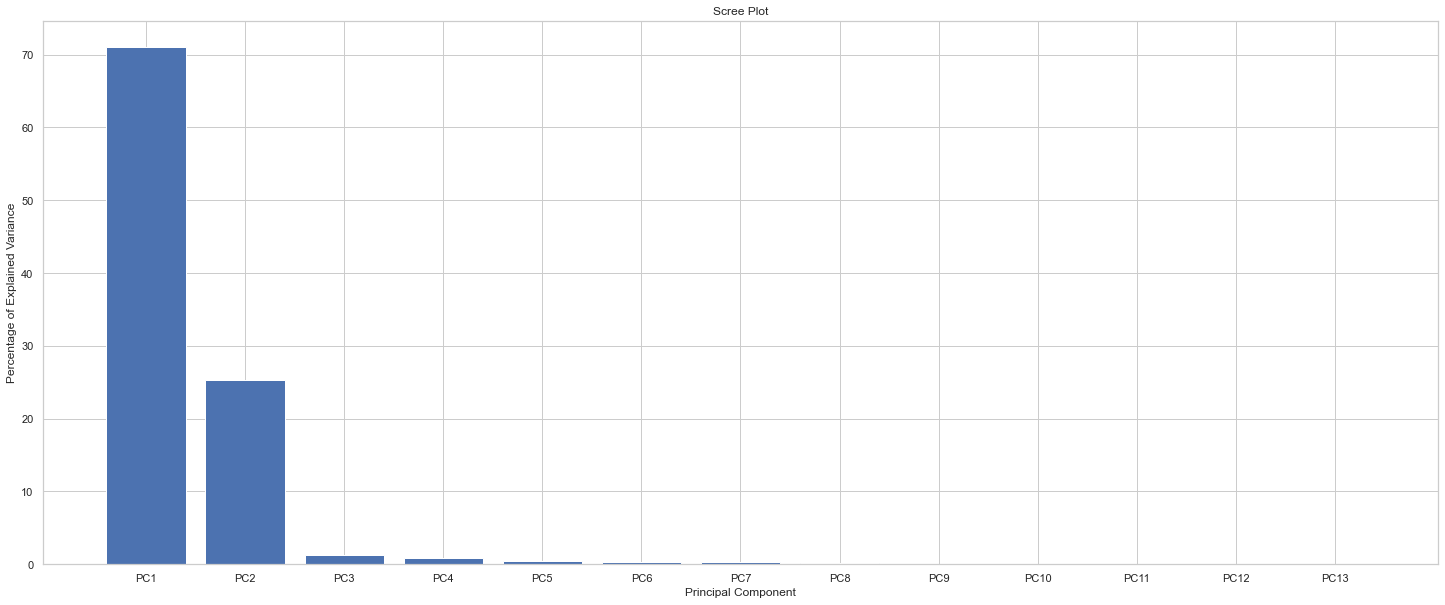

In [40]:
# Plotting a scree plot representing various principal components and their respective explained variation
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.figure(figsize=(25,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

__From the above graph one can observe that almost all of the variation is along the first pricipal component. Hence we can represent a our orginal data using 2 PCs__

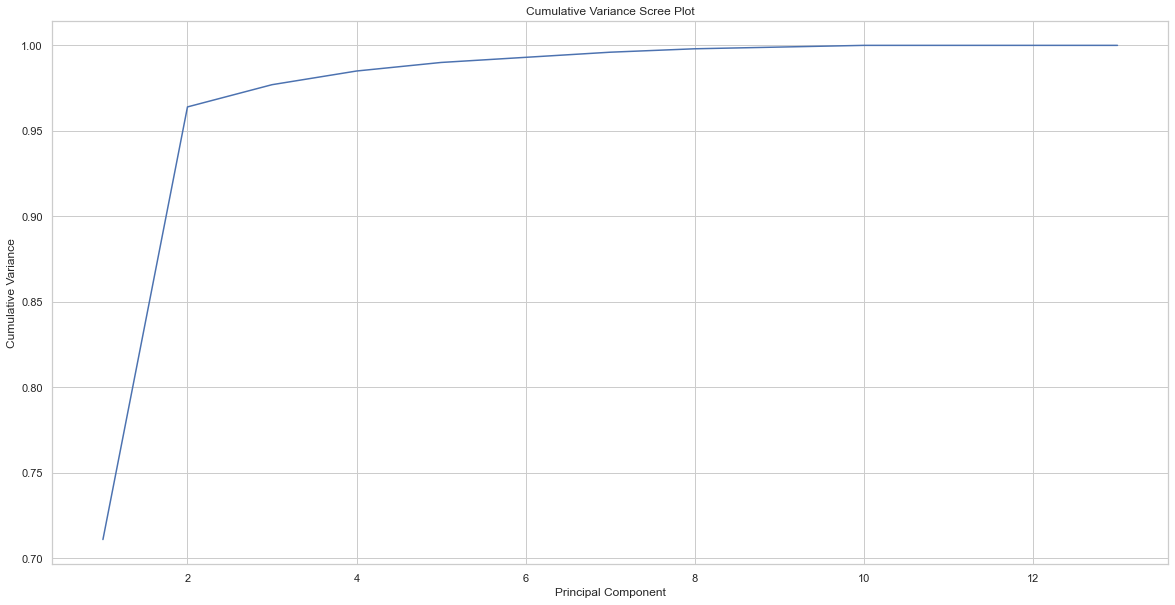

In [41]:
# Calculating cumlative variance
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
plt.figure(figsize=(20,10))
x=range(1,len(per_var)+1)
y=cumulative_variance
plt.plot(x, y)
plt.ylabel('Cumulative Variance')
plt.xlabel('Principal Component')
plt.title('Cumulative Variance Scree Plot')
plt.show()

__From the above graph one can observe that PC1 and PC2 can represent over 95% of variation of the data. Hence we can obtain 2 principle components with the help of PCA() such that they represent over 95% of variation of our given data__

In [42]:
# Obtaining 2 PCs such that they represent over 95% variation of our given dataset
pca_n = PCA(n_components=2)
pca_n.fit(X)
pca_data = pca_n.transform(X)
pca_df = pd.DataFrame(pca_data,columns=['PC1','PC2'])

In [74]:
pca_df.head()

,PC1,PC2
0,-24.223517,-14.514321
1,-23.151357,-14.474219
2,-22.252978,-14.510294
3,-21.208164,-14.503685
4,-20.446867,-14.466792


In [75]:
# Creating a hybrid dataset
df_temp = df2_std.copy()
df_temp['PC1'] = pca_df.PC1
df_temp['PC2'] = pca_df.PC2

In [76]:
df_temp.head()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered,PC1,PC2
0,2,1,-1.178670,0.304586,-0.200701,0.144028,-0.483568,-0.476902,-1.302217,-0.128626,-0.217091,0.118788,-1.168679,True,False,False,-24.223517,-14.514321
1,2,2,3.608919,-3.033032,-0.449116,-0.290315,-0.569578,-1.800519,2.071905,-0.754447,-0.276853,1.614954,3.492526,True,True,False,-23.151357,-14.474219
2,2,3,-0.946051,-0.945268,0.389194,0.088543,-0.007494,0.074416,-1.269412,0.181627,-0.239250,0.509092,0.385056,True,True,True,-22.252978,-14.510294
3,2,4,-0.741727,0.025825,-0.482520,0.202252,-0.456622,-0.031311,-0.559356,-0.422184,-0.242302,0.574143,-0.547185,True,True,True,-21.208164,-14.503685
4,2,5,-0.552794,-1.365662,4.276989,-0.502599,4.023547,-0.792949,-0.177608,4.905194,-0.122779,-0.922023,0.385056,True,True,False,-20.446867,-14.466792


In [77]:
#Saving the hybrid dataset
df_temp.to_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assigments\Assignment 3\Dataset\hybrid_dataset.csv')